In [139]:
!wget --no-check-certificate \
  https://raw.githubusercontent.com/codernewbie04/CII3C3-CaseBased1/main/data_arrhythmia.csv?raw=true \
  -O /content/data_arrhythmia.csv

--2022-11-04 09:41:20--  https://raw.githubusercontent.com/codernewbie04/CII3C3-CaseBased1/main/data_arrhythmia.csv?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368850 (360K) [text/plain]
Saving to: ‘/content/data_arrhythmia.csv’

/content/data_arrhy 100%[===================>] 360.21K  --.-KB/s    in 0.004s  

2022-11-04 09:41:20 (82.3 MB/s) - ‘/content/data_arrhythmia.csv’ saved [368850/368850]



In [140]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from cvxopt import matrix, solvers
import numpy as np
import seaborn as sns #visualisation 
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.preprocessing import MinMaxScaler
#Neural network module
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout, Flatten

In [141]:
df= pd.read_csv('./data_arrhythmia.csv',sep=';', na_values=['?'])


In [142]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [143]:
df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
               ..
LD              0
LE              0
LF              0
LG              0
diagnosis       0
Length: 280, dtype: int64

In [144]:
df.drop(df.columns[20:-2],axis=1, inplace=True)
df.drop(['T','P','J','LG'],axis=1, inplace=True)

In [145]:
df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
QRST            1
heart_rate      1
q_wave          0
r_wave          0
s_wave          0
R'_wave         0
S'_wave         0
diagnosis       0
dtype: int64

In [146]:
df['QRST'] = df['QRST'].fillna(37)
df['heart_rate'] = df['heart_rate'].fillna(74)
df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
QRST            0
heart_rate      0
q_wave          0
r_wave          0
s_wave          0
R'_wave         0
S'_wave         0
diagnosis       0
dtype: int64

In [147]:
cols= ["#6daa9f","#774571"]

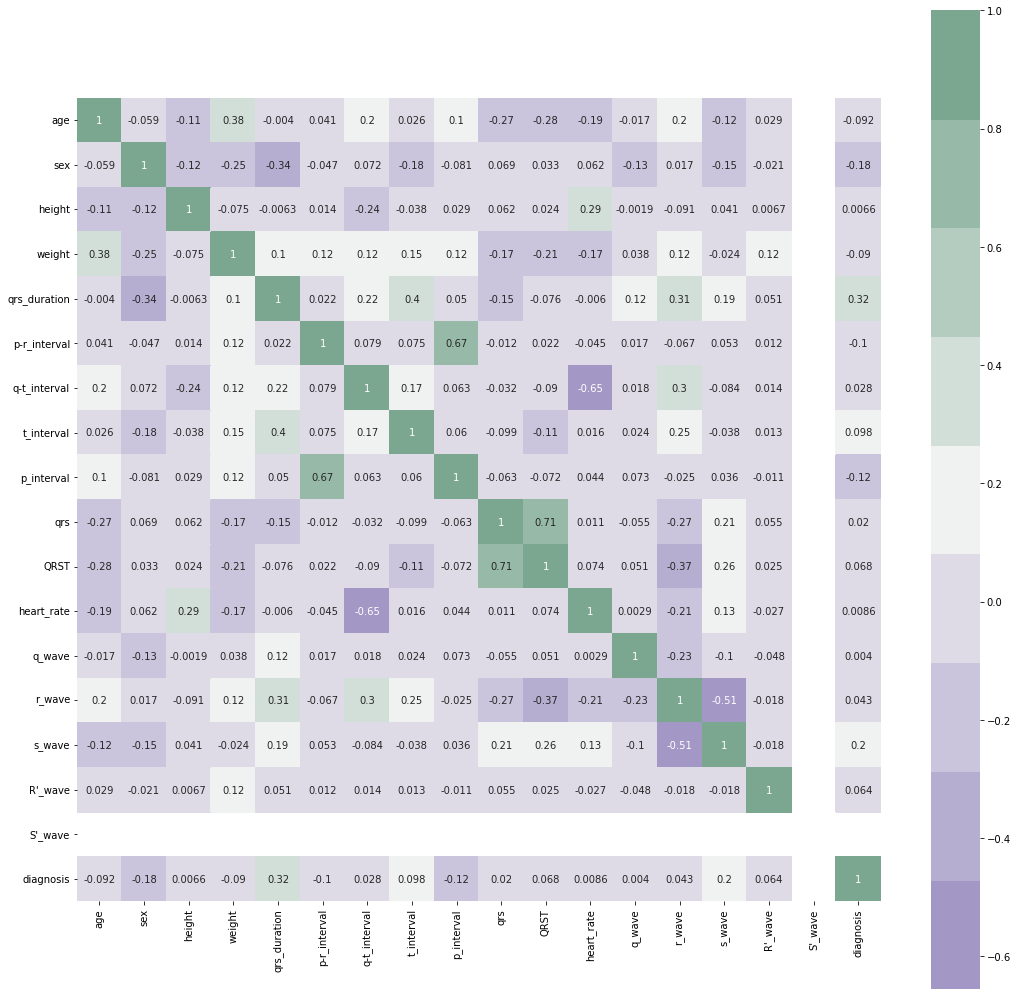

In [148]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [150]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,452.0,46.471239,16.466631,0.0,36.00,47.0,58.0,83.0
sex,452.0,0.550885,0.497955,0.0,0.00,1.0,1.0,1.0
height,452.0,166.188053,37.170340,105.0,160.00,164.0,170.0,780.0
weight,452.0,68.170354,16.590803,6.0,59.00,68.0,79.0,176.0
qrs_duration,452.0,88.920354,15.364394,55.0,80.00,86.0,94.0,188.0
p-r_interval,452.0,155.152655,44.842283,0.0,142.00,157.0,175.0,524.0
q-t_interval,452.0,367.207965,33.385421,232.0,350.00,367.0,384.0,509.0
t_interval,452.0,169.949115,35.633072,108.0,148.00,162.0,179.0,381.0
p_interval,452.0,90.004425,25.826643,0.0,79.00,91.0,102.0,205.0
qrs,452.0,33.676991,45.431434,-172.0,3.75,40.0,66.0,169.0


In [151]:
norm_risk_list = []
for diagnose in df.diagnosis:
    if diagnose == 1:
        norm_risk_list.append(True)
    else:
        norm_risk_list.append(False)
df["label"] = np.array(norm_risk_list)
df.drop(columns = ["diagnosis"],inplace = True)
df.label.value_counts()


True     245
False    207
Name: label, dtype: int64

In [152]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,QRST,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,label
0,75,0,190,80,91,193,371,174,121,-16,-2.0,63.0,0,52,44,0,0,False
1,56,1,165,64,81,174,401,149,39,25,31.0,53.0,0,48,0,0,0,False
2,54,0,172,95,138,163,386,185,102,96,66.0,75.0,0,40,80,0,0,False
3,55,0,175,94,100,202,380,179,143,28,20.0,71.0,0,72,20,0,0,True
4,75,0,190,80,88,181,360,177,103,-16,3.0,74.0,0,48,40,0,0,False


In [153]:
X=df.drop(["label"],axis=1)
y=df["label"]
print(X.shape)
print(y.shape)

(452, 17)
(452,)


In [154]:
from sklearn import preprocessing
from keras import callbacks
from keras.layers.convolutional import Conv2D

In [155]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,452.0,-3.929993e-17,1.001108,-2.825273,-0.636611,0.032147,0.700904,2.220809
sex,452.0,-7.859986e-17,1.001108,-1.107520,-1.107520,0.902918,0.902918,0.902918
height,452.0,3.812093e-16,1.001108,-1.647977,-0.166663,-0.058931,0.102667,16.531785
weight,452.0,2.318696e-16,1.001108,-3.751430,-0.553350,-0.010279,0.653473,6.506564
qrs_duration,452.0,2.515196e-16,1.001108,-2.210171,-0.581229,-0.190283,0.330978,6.455798
p-r_interval,452.0,-1.213385e-16,1.001108,-3.463797,-0.293634,0.041242,0.443094,8.234551
q-t_interval,452.0,2.908195e-16,1.001108,-4.054398,-0.516005,-0.006236,0.503532,4.251830
t_interval,452.0,3.222594e-16,1.001108,-1.740455,-0.616658,-0.223330,0.254284,5.929456
p_interval,452.0,-3.536994e-17,1.001108,-3.488806,-0.426560,0.038591,0.464980,4.457528
qrs,452.0,5.894990e-17,1.001108,-4.532212,-0.659459,0.139331,0.712256,2.981921


In [156]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.2,random_state=7)
X_test.shape

(91, 17)

In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [158]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()
model.add(Flatten())
model.add(Dense(units = 41, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 17))
model.add(Dropout(0.2))
model.add(Dense(units = 32, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))





from keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.build(X_train.shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (361, 17)                 0         
                                                                 
 dense_15 (Dense)            (361, 41)                 738       
                                                                 
 dropout_10 (Dropout)        (361, 41)                 0         
                                                                 
 dense_16 (Dense)            (361, 32)                 1344      
                                                                 
 dropout_11 (Dropout)        (361, 32)                 0         
                                                                 
 dense_17 (Dense)            (361, 1)                  33        
                                                                 
Total params: 2,115
Trainable params: 2,115
Non-traina

In [159]:
loss, acc = model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 1ms/step - loss: 0.7536 - accuracy: 0.4404


In [160]:



# model.add(Dense(units = 12, kernel_initializer = 'glorot_uniform', activation = 'relu'))
# model.add(Dropout(0.25))
# model.add(Dense(units = 9, kernel_initializer = 'glorot_uniform', activation = 'relu'))
# model.add(Dense(2, activation='relu', kernel_initializer="glorot_uniform"))




# Train the ANN
history = model.fit(X_train, y_train, batch_size = 12, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
24/24 [==============================] - 0s 4ms/step - loss: 0.7730 - accuracy: 0.4410 - val_loss: 0.7172 - val_accuracy: 0.4795
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 0.7324 - accuracy: 0.5035 - val_loss: 0.7005 - val_accuracy: 0.4658
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 0.7243 - accuracy: 0.5000 - val_loss: 0.6885 - val_accuracy: 0.5068
Epoch 4/500
24/24 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5278 - val_loss: 0.6765 - val_accuracy: 0.6027
Epoch 5/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5486 - val_loss: 0.6658 - val_accuracy: 0.6301
Epoch 6/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5868 - val_loss: 0.6567 - val_accuracy: 0.6575
Epoch 7/500
24/24 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5833 - val_loss: 0.6489 - val_accuracy: 0.6575
Epoch 8/500
2

In [161]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 75.38%


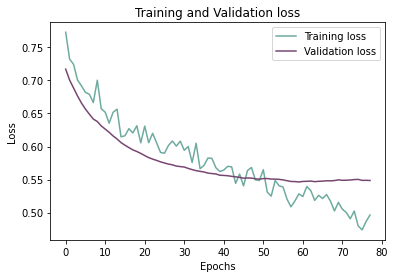

In [162]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

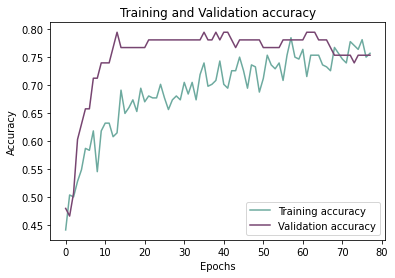

In [163]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [164]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 3ms/step


In [165]:
len(X_test)

91

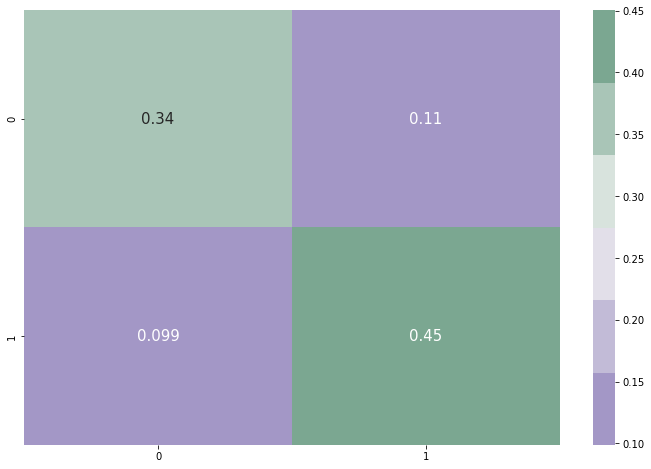

In [166]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.78      0.76      0.77        41
        True       0.80      0.82      0.81        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

